# Assignment: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [3]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [4]:
df
# There are 716314 rows.

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
716349,2024076S13137,2024,19,SP,EA,MEGAN,2024-03-18 06:00:00,NR,-16.0000,136.7000,NaN,NaN
716350,2024076S13137,2024,19,SP,EA,MEGAN,2024-03-18 09:00:00,NR,-16.1801,136.5190,NaN,NaN
716351,2024076S13137,2024,19,SP,EA,MEGAN,2024-03-18 12:00:00,NR,-16.3393,136.3200,NaN,NaN
716352,2024076S13137,2024,19,SP,EA,MEGAN,2024-03-18 15:00:00,NR,-16.4760,136.1120,NaN,NaN


How many North Atlantic hurricanes are in this dataset?

In [5]:
df_NA = df[df.BASIN=='NA']
len(df_NA.SID.unique())

df_NA.SID.count()

# There are 2345 unique NA hurricanes, but 126593 total NA hurricanes.

126593

### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [6]:
df.BASIN.unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [7]:
df.SUBBASIN.unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [8]:
df.NATURE.unique()

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [9]:
df.rename(columns={'WMO_WIND': 'WIND', 'WMO_PRES': 'PRES'}, inplace=True)

### 3) Get the 10 largest rows in the dataset by `WIND`

In [10]:
df.WIND.nlargest(10)

666142    185.0
666140    180.0
666144    180.0
427655    165.0
178210    160.0
178211    160.0
178213    160.0
482093    160.0
552477    160.0
605764    160.0
Name: WIND, dtype: float64

In [11]:
df.nlargest(10, 'WIND')

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666142,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666140,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666144,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
427655,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
482093,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
552477,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
605764,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [12]:
df.groupby('SID').max().nlargest(10, 'WIND')

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
SID,,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0000,185.0,1007.0
1980214N11330,1980,57,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0000,165.0,1010.0
1935241N23291,1935,46,NA,NA,NaN,1935-09-10 12:00:00,TS,57.0,-31.1196,160.0,996.0
1988253N12306,1988,74,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0000,160.0,1008.0
1997253N12255,1997,81,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7000,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0000,160.0,1004.0
2019236N10314,2019,52,NA,NA,DORIAN,2019-09-09 00:00:00,TS,51.6,-46.4000,160.0,1011.0
1998295N12284,1998,89,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0000,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9000,155.0,1009.0


### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

<Axes: xlabel='NAME'>

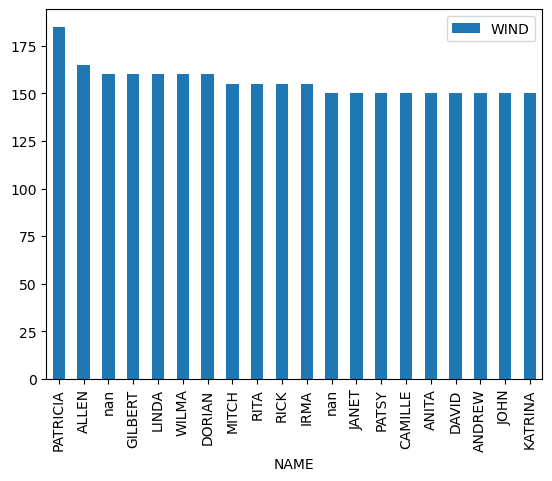

In [13]:
df.groupby('SID').max().nlargest(20, 'WIND').plot(x= 'NAME', y='WIND', kind='bar')
#CHANGE TO NAMES

### 6) Plot the count of all datapoints by Basin

as a bar chart

In [14]:
df.groupby('BASIN').SID.count()

BASIN
EP     63640
NA    126593
NI     55773
SA       119
SI    163557
SP     68222
WP    238450
Name: SID, dtype: int64

<Axes: title={'center': 'Number of all Datapoints by Basin'}, xlabel='Basin', ylabel='Counts'>

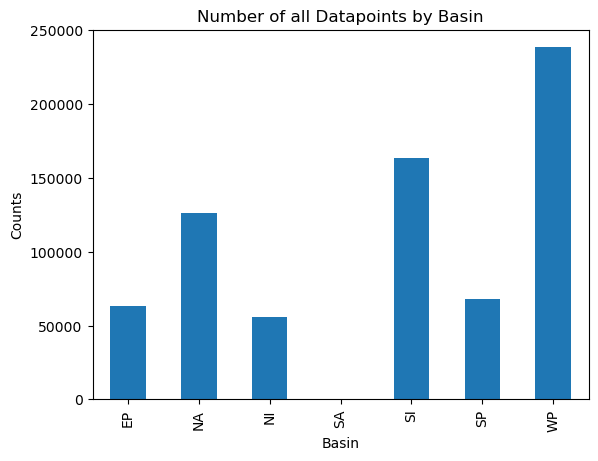

In [17]:
df.groupby('BASIN').SID.count().plot(kind='bar',  ylabel='Counts', xlabel='Basin', title='Number of all Datapoints by Basin')

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

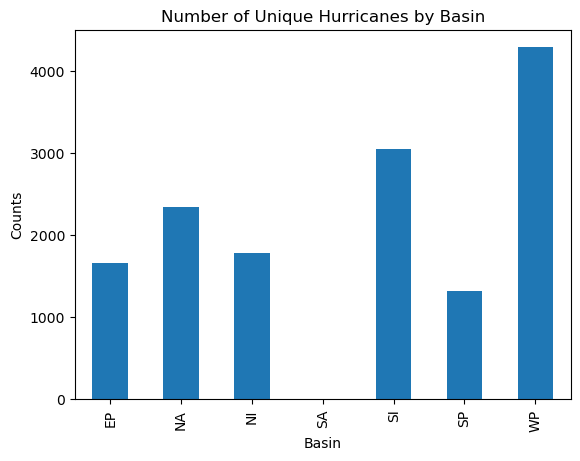

In [18]:
df.groupby('BASIN').SID.nunique().plot(kind='bar', ylabel='Counts', xlabel='Basin', title='Number of Unique Hurricanes by Basin');

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

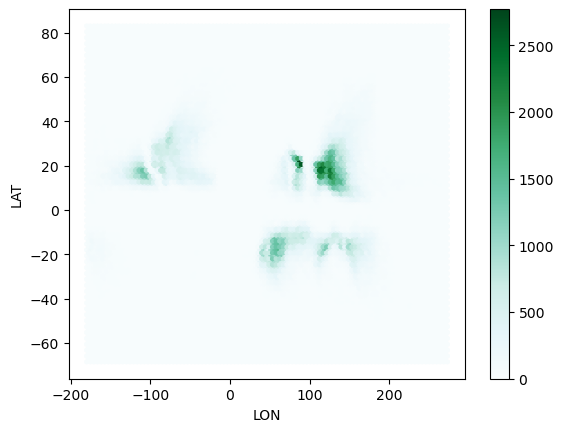

In [69]:
df.plot.hexbin(x='LON', y='LAT');

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [19]:
df_katrina = df[(df.NAME=='KATRINA')]
df_katrina

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
332516,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 00:00:00,TS,17.8000,-107.2000,45.0,NaN
332517,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 03:00:00,TS,17.9859,-107.5960,NaN,NaN
332518,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 06:00:00,TS,18.2120,-107.9900,45.0,NaN
332519,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 09:00:00,TS,18.5131,-108.3860,NaN,NaN
332520,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 12:00:00,TS,18.9000,-108.8000,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
603822,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
603823,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
603824,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
603825,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

In [20]:
df_katrina_2005 = df_katrina[(df_katrina.SEASON==2005)]
df_katrina_2005

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
603763,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1000,-75.1000,30.0,1008.0
603764,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2476,-75.4049,NaN,NaN
603765,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4000,-75.7000,30.0,1007.0
603766,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.5700,-75.9726,NaN,NaN
603767,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8000,-76.2000,30.0,1007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
603822,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
603823,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
603824,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
603825,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


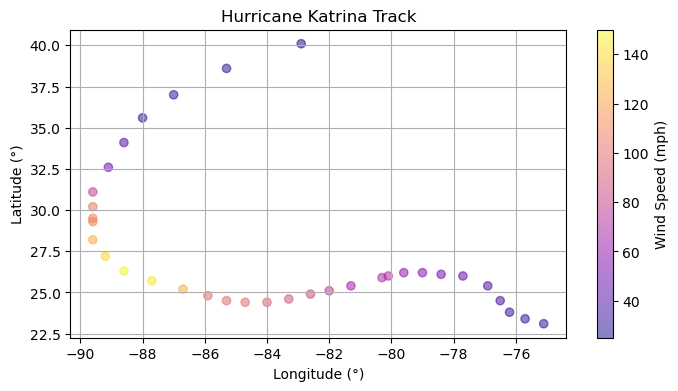

In [32]:
plt.figure(figsize=(8, 4))
plt.scatter(x=df_katrina_2005['LON'], y=df_katrina_2005['LAT'], c=df_katrina_2005['WIND'], cmap='plasma', alpha=0.5)
plt.colorbar(label='Wind Speed (mph)')
plt.title('Hurricane Katrina Track')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.grid(True)

### 10) Make time the index on your dataframe

In [30]:
df.set_index('ISO_TIME', inplace=True)
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18 06:00:00,2024076S13137,2024,19,SP,EA,MEGAN,NR,-16.0000,136.7000,NaN,NaN
2024-03-18 09:00:00,2024076S13137,2024,19,SP,EA,MEGAN,NR,-16.1801,136.5190,NaN,NaN
2024-03-18 12:00:00,2024076S13137,2024,19,SP,EA,MEGAN,NR,-16.3393,136.3200,NaN,NaN


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

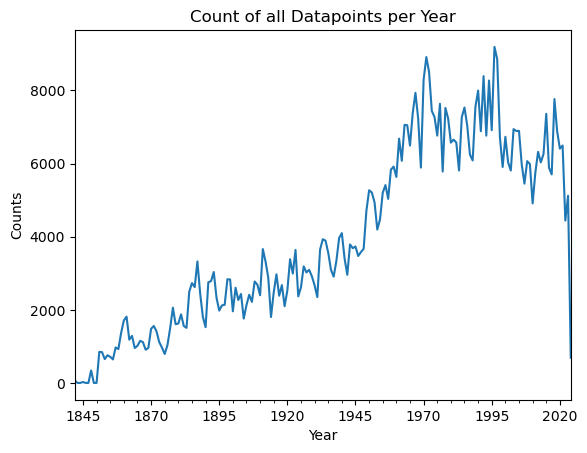

In [33]:
df.resample('YE').size().plot(xlabel='Year', ylabel='Counts', title='Count of all Datapoints per Year');

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

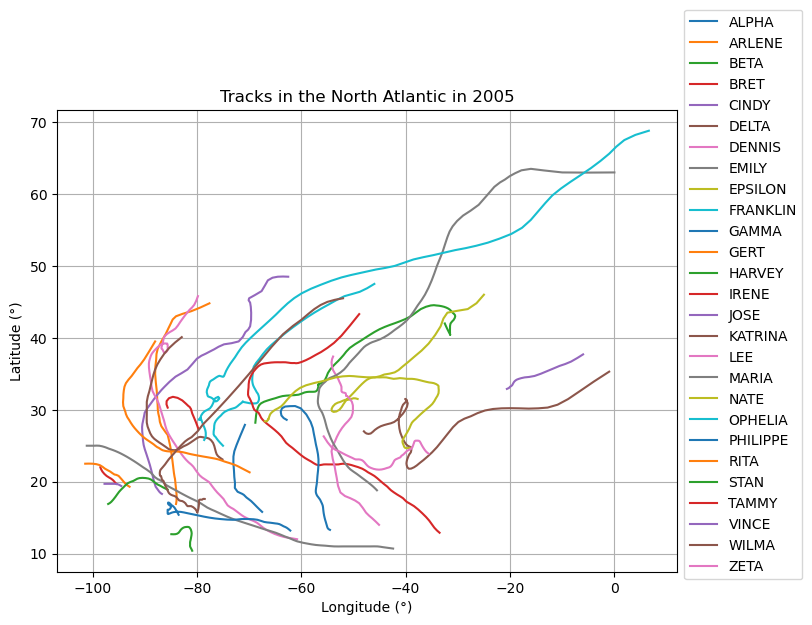

In [44]:
NA_2005 = df[(df['BASIN'] == 'NA') & (df['SEASON'] == 2005)]
NA_2005

NA_2005_NAME = NA_2005.groupby('NAME')

plt.figure(figsize=(8, 6))

for name, group in NA_2005_NAME:
    plt.plot(group['LON'], group['LAT'], label=name)

plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('Tracks in the North Atlantic in 2005')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6))
plt.grid(True)

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [45]:
NA_1970 = df[(df['BASIN'] == 'NA') & (df['SEASON'] >= 1970)]
NA_1970

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5000,-79.0000,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.6475,-79.1400,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.8000,-79.3000,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.9575,-79.4925,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.1000,-79.7000,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 12:00:00,2023319N11282,2023,80,NA,CS,NaN,NR,17.0364,-79.8000,NaN,NaN
2023-11-17 15:00:00,2023319N11282,2023,80,NA,CS,NaN,NR,17.4991,-79.1718,NaN,NaN
2023-11-17 18:00:00,2023319N11282,2023,80,NA,CS,NaN,NR,18.0000,-78.5000,NaN,NaN


### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

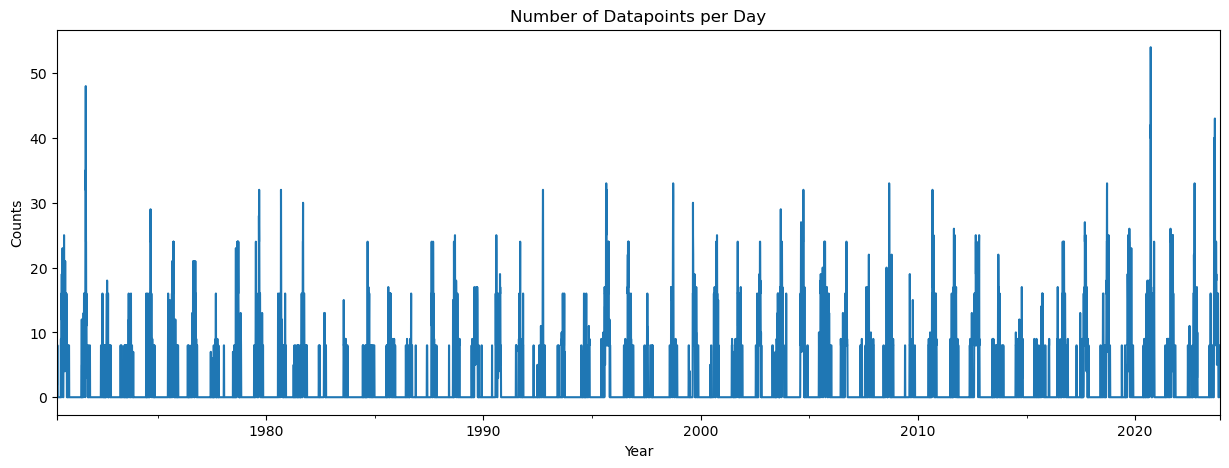

In [52]:
NA_1970.resample('D').size().plot(figsize=(15,5), xlabel='Year', ylabel='Counts', title='Number of Datapoints per Day');

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

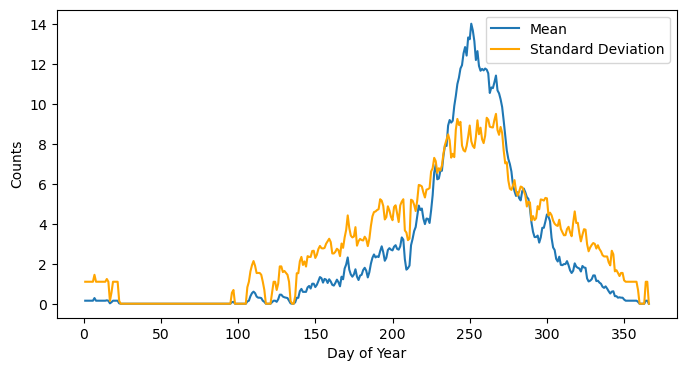

In [56]:
# Resample
NA_1970_day=NA_1970.resample('D').count()

# Create DOY (the day of year) column
NA_1970_day.loc[:, 'DOY']=  NA_1970_day.index.dayofyear

# Group data by DOY
# calculate  mean and SD per season
mean_SD_NA_1970_day = NA_1970_day.groupby('DOY').agg({'SEASON':['mean', 'std']})

plt.figure(figsize=(8, 4))
plt.plot(mean_SD_NA_1970_day['SEASON']['mean'], label='Mean');
plt.plot(mean_SD_NA_1970_day['SEASON']['std'], label='Standard Deviation', color='orange');
plt.legend();
plt.xlabel('Day of Year');
plt.ylabel('Counts');

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

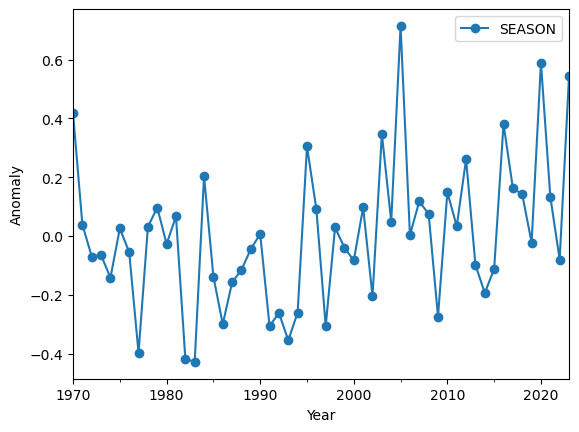

In [61]:
# Define function
def standardize(x):
    return (x - x.mean())/x.std()

# Calculate anomalies
anom_NA_1970 = NA_1970_day.groupby('DOY').transform(standardize)

# Resample and calculate mean anomaly of counts per year
ann_anom_NA_1970 = anom_NA_1970.resample('YE').mean()

# Plot anomalies per year
ann_anom_NA_1970['SEASON'].plot(marker='o')

plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.legend()

Which years stand out as having anomalous hurricane activity?

#### The year 2005 has the highest anomalous hurricane activity.